# Lending Club Case Study

This company is the largest online loan marketplace, facilitating loans. The company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default. 

In [63]:
# importing the necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import random

#### Reading the loan data

In [64]:
df=pd.read_csv('loan.csv', low_memory=False)

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


## Part1 - Data Understanding - Data Handling and Cleaning

#### 1.1 Duplicates and NAN treament

In [66]:
## remove duplicates and keep first occurrences
df=df.drop_duplicates(keep='first', inplace=False)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.9+ MB
None


In [67]:
## data has no duplicates

In [68]:
df.shape

(39717, 111)

In [69]:
#Check the number of NAN values in the columns
df.isna().sum()
# few columns have all values as NAN, need to drop those columns.
# also, we can drop columns having most of the values as NAN. 

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [70]:
df.isna().sum()/df.shape[0]

id                            0.000000
member_id                     0.000000
loan_amnt                     0.000000
funded_amnt                   0.000000
funded_amnt_inv               0.000000
                                ...   
tax_liens                     0.000982
tot_hi_cred_lim               1.000000
total_bal_ex_mort             1.000000
total_bc_limit                1.000000
total_il_high_credit_limit    1.000000
Length: 111, dtype: float64

In [71]:
## removing columns which have more than 20% NAN values
limit=len(df)*0.8

In [72]:
df_clean=df.dropna(thresh=limit,axis=1)

In [73]:
df_clean.shape

(39717, 53)

In [74]:
df_clean.isna().sum()/df_clean.shape[0]

id                            0.000000
member_id                     0.000000
loan_amnt                     0.000000
funded_amnt                   0.000000
funded_amnt_inv               0.000000
term                          0.000000
int_rate                      0.000000
installment                   0.000000
grade                         0.000000
sub_grade                     0.000000
emp_title                     0.061913
emp_length                    0.027066
home_ownership                0.000000
annual_inc                    0.000000
verification_status           0.000000
issue_d                       0.000000
loan_status                   0.000000
pymnt_plan                    0.000000
url                           0.000000
purpose                       0.000000
title                         0.000277
zip_code                      0.000000
addr_state                    0.000000
dti                           0.000000
delinq_2yrs                   0.000000
earliest_cr_line         

In [75]:
# Now only 53 columns are remaining

In [76]:
# removing rows having NAN values
df_clean.dropna(axis=0, inplace= True)

C:\Users\aarya\AppData\Local\Temp\ipykernel_22916\3990279075.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean.dropna(axis=0, inplace= True)


In [77]:
df_clean.reset_index(inplace=True, drop=True)

In [78]:
df_clean.shape

(36431, 53)

In [79]:
df_clean.isna().sum()
# no NAN values in the dataframe

id                            0
member_id                     0
loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_title                     0
emp_length                    0
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
loan_status                   0
pymnt_plan                    0
url                           0
purpose                       0
title                         0
zip_code                      0
addr_state                    0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_ac

#### 1.2 column datatypes

In [80]:
df_clean.dtypes

id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
term                           object
int_rate                       object
installment                   float64
grade                          object
sub_grade                      object
emp_title                      object
emp_length                     object
home_ownership                 object
annual_inc                    float64
verification_status            object
issue_d                        object
loan_status                    object
pymnt_plan                     object
url                            object
purpose                        object
title                          object
zip_code                       object
addr_state                     object
dti                           float64
delinq_2yrs                     int64
earliest_cr_line               object
inq_last_6mt

In [81]:
##removing unnecessary characters from the columns below and changing the datatype to float
df_clean['int_rate']=df_clean['int_rate'].apply(lambda x:float(x.strip('%')))
df_clean['revol_util']=df_clean['revol_util'].apply(lambda x:str(x))
df_clean['revol_util']=df_clean['revol_util'].apply(lambda x:float(x.strip('%')))

C:\Users\aarya\AppData\Local\Temp\ipykernel_22916\467361039.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['int_rate']=df_clean['int_rate'].apply(lambda x:float(x.strip('%')))
C:\Users\aarya\AppData\Local\Temp\ipykernel_22916\467361039.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['revol_util']=df_clean['revol_util'].apply(lambda x:str(x))
C:\Users\aarya\AppData\Local\Temp\ipykernel_22916\467361039.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

In [82]:
## converting date columns to proper date format
import datetime
df_clean['last_credit_pull_d'] = df_clean['last_credit_pull_d'].apply(lambda x: datetime.datetime.strptime(x,"%b-%y").strftime('%d/%m/%Y'))
df_clean['last_pymnt_d'] = df_clean['last_pymnt_d'].apply(lambda x: datetime.datetime.strptime(x,"%b-%y").strftime('%d/%m/%Y'))
df_clean['issue_d'] = df_clean['issue_d'].apply(lambda x: datetime.datetime.strptime(x,"%b-%y").strftime('%d/%m/%Y'))


C:\Users\aarya\AppData\Local\Temp\ipykernel_22916\2375767353.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['last_credit_pull_d'] = df_clean['last_credit_pull_d'].apply(lambda x: datetime.datetime.strptime(x,"%b-%y").strftime('%d/%m/%Y'))
C:\Users\aarya\AppData\Local\Temp\ipykernel_22916\2375767353.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['last_pymnt_d'] = df_clean['last_pymnt_d'].apply(lambda x: datetime.datetime.strptime(x,"%b-%y").strftime('%d/%m/%Y'))
C:\Users\aarya\App

#### 1.3 Removing column which are not required

In [83]:
df_clean.drop(['id','member_id','url','pymnt_plan','emp_title','title'],inplace=True,axis=1)

C:\Users\aarya\AppData\Local\Temp\ipykernel_22916\4287989744.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean.drop(['id','member_id','url','pymnt_plan','emp_title','title'],inplace=True,axis=1)


In [84]:
df_clean.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'collections_12_mths_ex_med', 'policy_code',
       'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths',
       'delinq_amnt', 'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

In [85]:
df_clean.shape

(36431, 47)

In [86]:
## remving columns having just one unique value 
df_clean2=df_clean.drop(df_clean.columns[df_clean.apply(lambda col: col.nunique()==1)], axis=1)


In [87]:
#delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,application_type

## Part2 - Univariate analysis 

In [89]:
df_clean2.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,...,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies
count,36431.000000,36431.000000,36431.000000,36431.000000,36431.000000,3.643100e+04,36431.000000,36431.000000,36431.000000,36431.000000,...,36431.000000,36431.000000,36431.000000,36431.000000,36431.000000,36431.000000,36431.000000,36431.000000,36431.000000,36431.000000
mean,11307.794186,11032.933491,10601.876895,12.073891,326.187642,6.930694e+04,13.444293,0.146139,0.864840,9.351679,...,52.216180,12311.226392,11841.691116,9912.631803,2304.442520,1.299912,92.852238,11.677622,2743.075381,0.041366
std,7433.904309,7166.520054,7072.645601,3.734857,207.390058,6.354376e+04,6.643417,0.492211,1.063383,4.373724,...,378.454016,9048.552965,8911.170172,7053.310578,2629.598904,7.065817,682.064837,140.884174,4473.621163,0.200100
min,500.000000,500.000000,0.000000,5.420000,16.080000,4.000000e+03,0.000000,0.000000,0.000000,2.000000,...,0.000000,33.730000,0.000000,0.000000,6.220000,0.000000,0.000000,0.000000,0.010000,0.000000
25%,5600.000000,5500.000000,5000.000000,9.320000,168.900000,4.200000e+04,8.360000,0.000000,0.000000,6.000000,...,0.000000,5672.634184,5413.880000,4800.000000,678.030000,0.000000,0.000000,0.000000,226.310000,0.000000
50%,10000.000000,10000.000000,9203.371902,11.860000,283.280000,6.000000e+04,13.540000,0.000000,1.000000,9.000000,...,0.000000,10101.589360,9632.410000,8123.600000,1379.820000,0.000000,0.000000,0.000000,571.700000,0.000000
75%,15000.000000,15000.000000,14508.774540,14.650000,432.220000,8.300000e+04,18.690000,0.000000,1.000000,12.000000,...,0.000000,16700.865405,16094.780000,14000.000000,2891.865000,0.000000,0.000000,0.000000,3457.620000,0.000000
max,35000.000000,35000.000000,35000.000000,24.400000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,44.000000,...,6307.370000,58563.679930,58563.680000,35000.020000,23563.680000,180.200000,29623.350000,7002.190000,36115.200000,2.000000


#### 2.1 Univariate Analysis - Continuous Variables

In [93]:
df1=df_clean2.describe()
# df1.coulmns gives the list of continuos variables

C:\Users\aarya\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\aarya\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\aarya\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

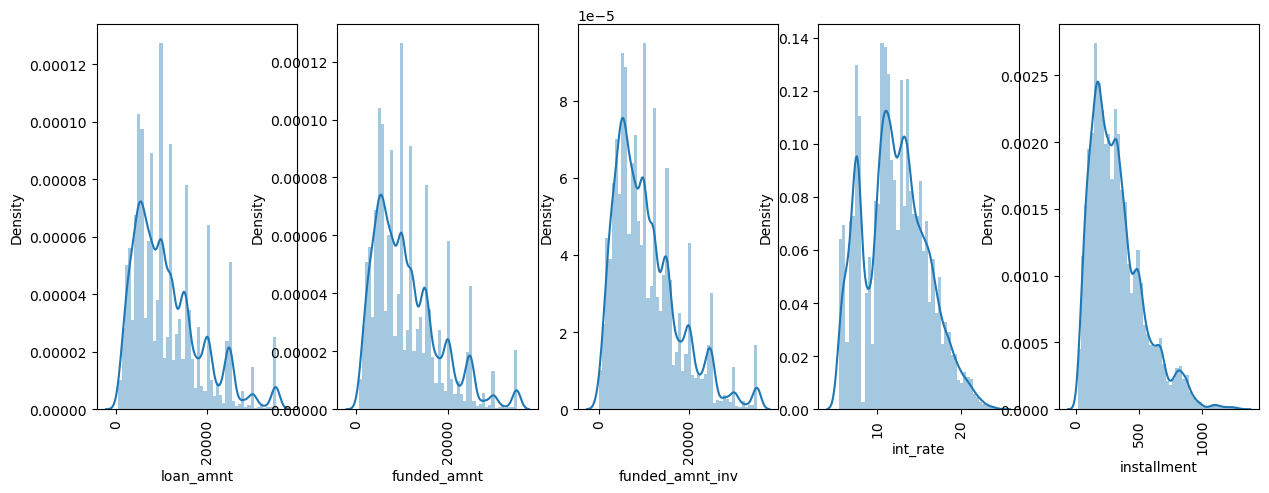

In [91]:
plt.figure(figsize=(15,5))
for i in range(0,5):
    plt.subplot(1, 5, i+1)
    plt.xticks(rotation=90)
    sns.distplot(df_clean2[df1.columns[i]])

C:\Users\vinaynk\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\vinaynk\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\vinaynk\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an ax

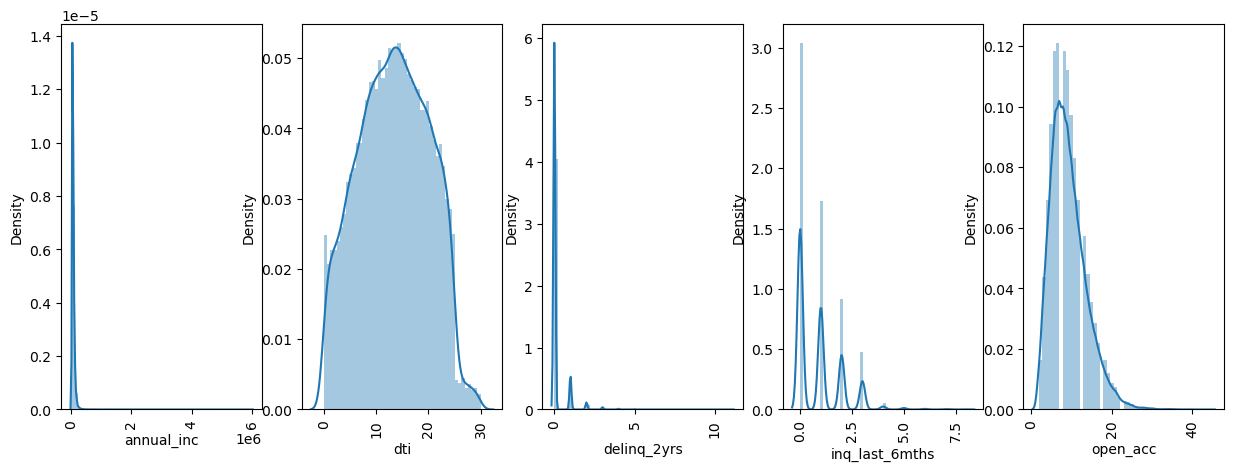

In [20]:
plt.figure(figsize=(15,5))
for i in range(5,10):
    plt.subplot(1, 5, i-4)
    plt.xticks(rotation=90)
    sns.distplot(df_clean2[df1.columns[i]])

C:\Users\vinaynk\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\vinaynk\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\vinaynk\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an ax

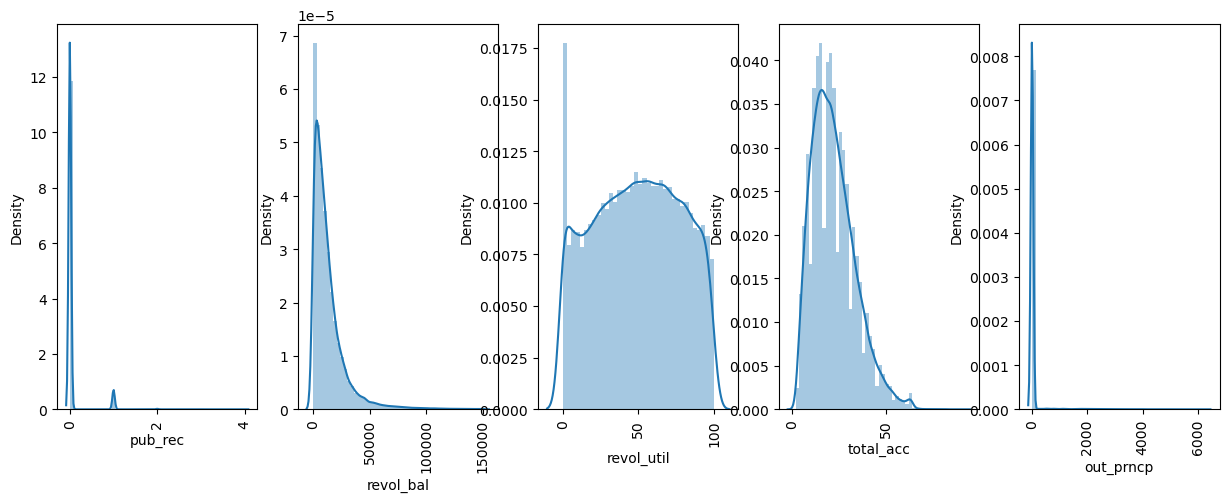

In [21]:
    
plt.figure(figsize=(15,5))
for i in range(10,15):
    plt.subplot(1, 5, i-9)
    plt.xticks(rotation=90)
    sns.distplot(df_clean2[df1.columns[i]])

C:\Users\vinaynk\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\vinaynk\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\vinaynk\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an ax

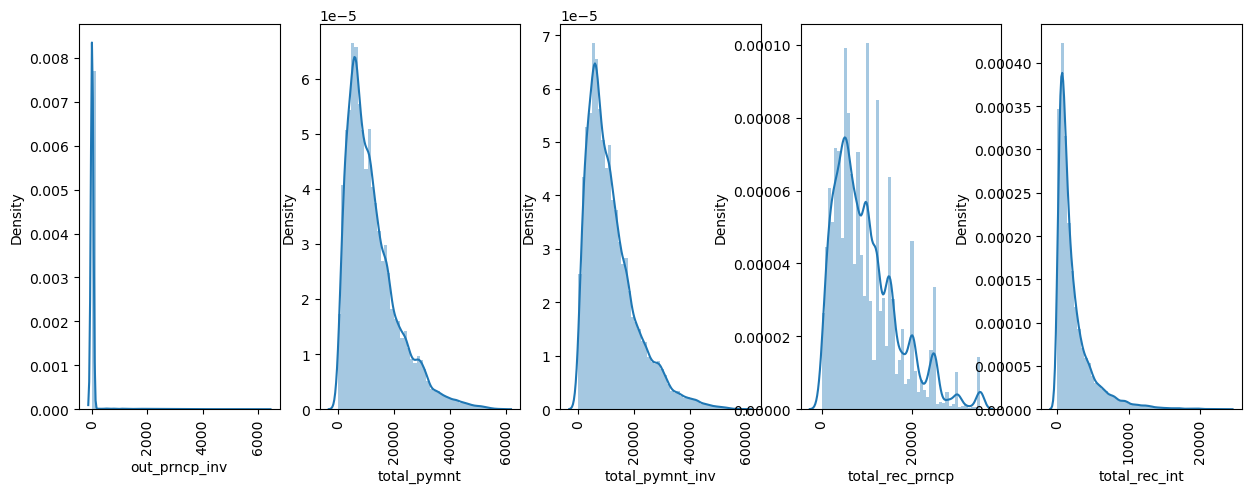

In [22]:
plt.figure(figsize=(15,5))
for i in range(15,20):
    plt.subplot(1, 5, i-14)
    plt.xticks(rotation=90)
    sns.distplot(df_clean2[df1.columns[i]])

C:\Users\vinaynk\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\vinaynk\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\vinaynk\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an ax

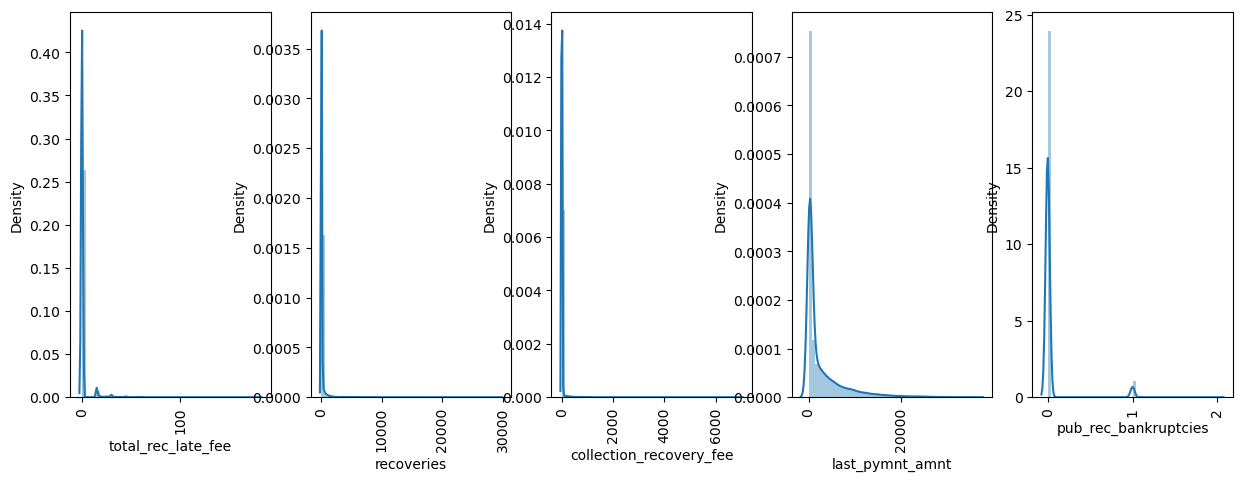

In [23]:
plt.figure(figsize=(15,5))
for i in range(20,25):
    plt.subplot(1, 5, i-19)
    plt.xticks(rotation=90)
    sns.distplot(df_clean2[df1.columns[i]])

#### 2.2 Listing out the variable which are skewed

 1. Annual income
 2. delinq_2yrs
 3. pub_rec
 4. out_prncp_inv
 5. total_rec_late_fee
 6. recoveries
 7. collection_recovery_fee
 8.pub_rec_bankruptcies
 
 Bucketing these continuos variables where possible

C:\Users\vinaynk\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='annual_inc', ylabel='Density'>

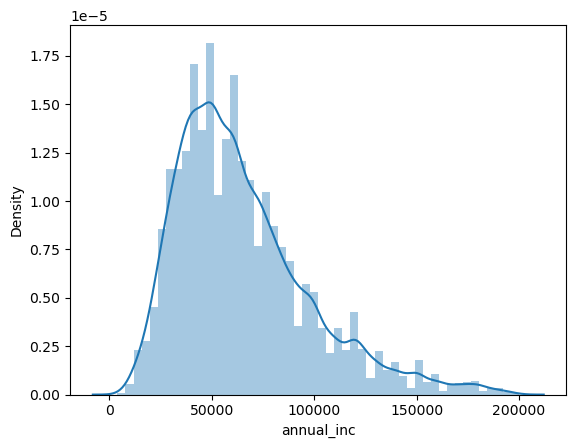

In [24]:
sns.distplot(df_clean2[df_clean2['annual_inc']<200000].annual_inc)

In [218]:
df_clean2['annual_inc'].describe().apply("{0:.5f}".format)

count      36431.00000
mean       69306.93866
std        63543.76336
min         4000.00000
25%        42000.00000
50%        60000.00000
75%        83000.00000
max      6000000.00000
Name: annual_inc, dtype: object

based on quantile we will bucket the column annual_inc

In [272]:
df_clean2['annual_inc_cat']=df_clean2['annual_inc'].apply(lambda x: "low" if x <= 42000  else ("medium" if(x <= 83000 and x > 42000) else "high"))

Based on value counts majority of the value are 0 for deling_2yrs

In [220]:
df_clean2['delinq_2yrs'].value_counts()

0     32484
1      3028
2       628
3       197
4        55
5        21
6        10
7         4
8         2
9         1
11        1
Name: delinq_2yrs, dtype: int64

In [273]:
df_clean2['delinq_2yrs_cat']=df_clean2['delinq_2yrs'].apply(lambda x: ">0" if x >0 else "0")

Based on value counts majority of the value are 0 for pub_rec


In [222]:
df_clean2['pub_rec'].value_counts()

0    34543
1     1832
2       47
3        7
4        2
Name: pub_rec, dtype: int64

In [274]:
df_clean2['pub_rec_cat']=df_clean2['pub_rec'].apply(lambda x: ">0" if x >0 else "0")

In [224]:
df_clean2['out_prncp'].value_counts()

0.00       35365
2277.11        2
1972.60        2
2963.24        2
1053.64        1
           ...  
782.23         1
2296.41        1
1928.85        1
1061.32        1
79.24          1
Name: out_prncp, Length: 1064, dtype: int64

In [225]:
df_clean2['out_prncp_inv'].value_counts()

0.00       35365
1664.64        2
1972.60        2
1163.60        1
138.32         1
           ...  
2289.14        1
1928.85        1
1061.32        1
1974.48        1
79.24          1
Name: out_prncp_inv, Length: 1065, dtype: int64

In [275]:
df_clean2['out_prncp_cat']=df_clean2['out_prncp'].apply(lambda x: "non-zero" if x >0 else "0")

In [227]:
df_clean2['out_prncp_inv_cat']=df_clean2['out_prncp_inv'].apply(lambda x: "1" if x >0 else "0")

In [276]:
df_clean2['total_rec_late_fee'].value_counts()

0.000000     34616
15.000000      224
30.000000       51
15.000000       49
15.000000       42
             ...  
30.260000        1
14.946207        1
25.530000        1
14.987132        1
52.262227        1
Name: total_rec_late_fee, Length: 1194, dtype: int64

In [228]:
df_clean2['total_rec_late_fee_cat']=df_clean2['total_rec_late_fee'].apply(lambda x: "1" if x >0 else "0")

In [277]:
df_clean2['recoveries'].value_counts()

0.00       32704
9.80           3
11.29          3
13.93          3
10.40          3
           ...  
310.84         1
138.74         1
289.51         1
398.91         1
1909.87        1
Name: recoveries, Length: 3584, dtype: int64

In [278]:
df_clean2['recoveries_cat']=df_clean2['recoveries'].apply(lambda x: "1" if x >0 else "0")

In [279]:
df_clean2['collection_recovery_fee'].value_counts()

0.0000      33099
1.2000         10
2.0000          9
1.6900          8
2.0200          8
            ...  
2.9400          1
9.5864          1
14.5170         1
15.3684         1
668.3600        1
Name: collection_recovery_fee, Length: 2386, dtype: int64

In [ ]:
df_clean2['collection_recovery_fee_cat']=df_clean2['collection_recovery_fee'].apply(lambda x: "1" if x >0 else "0")

In [280]:
df_clean2['pub_rec_bankruptcies'].value_counts()

0.0    34931
1.0     1493
2.0        7
Name: pub_rec_bankruptcies, dtype: int64

In [ ]:
df_clean2['pub_rec_bankruptcies_cat']=df_clean2['pub_rec_bankruptcies'].apply(lambda x: "1" if x >0 else "0")

#### 2.3 Univariate Analysis- Categorical variable analysis 

In [230]:
df_cat = df_clean2.select_dtypes('object')
print(df_cat.columns) # df_cat.columns gives the list of categorical variables

Index(['term', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'zip_code',
       'addr_state', 'earliest_cr_line', 'last_pymnt_d', 'last_credit_pull_d',
       'loan_status_var', 'loan_status_bucket', 'annual_inc_cat',
       'delinq_2yrs_cat', 'pub_rec_cat', 'out_prncp_cat', 'out_prncp_inv_cat',
       'total_rec_late_fee_cat', 'recoveries_cat',
       'collection_recovery_fee_cat', 'pub_rec_bankruptcies_cat'],
      dtype='object')


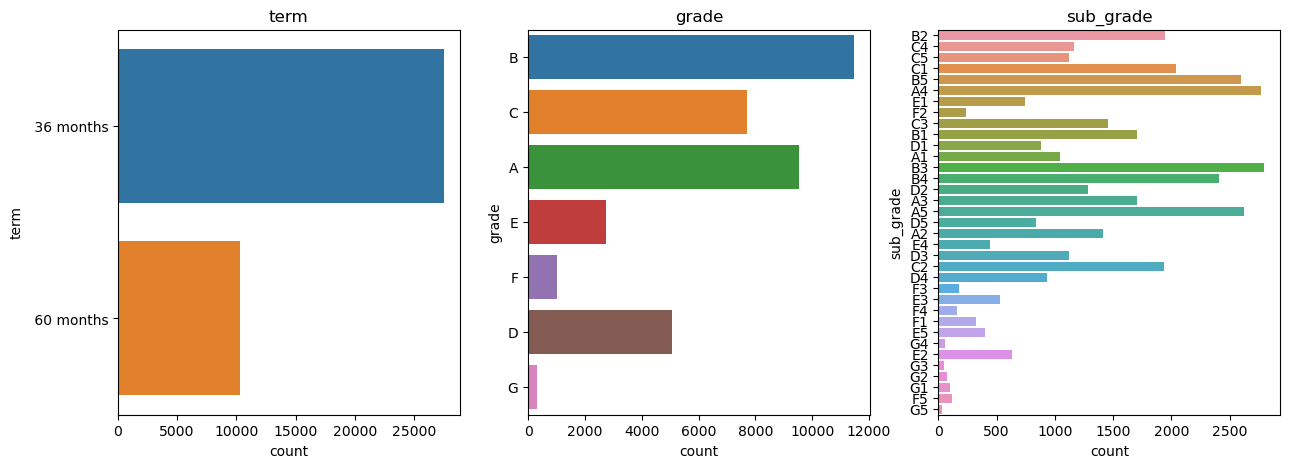

In [37]:
plt.figure(figsize=(15,5))
for i in range(0,3):
    plt.subplot(1, 3, i+1)
    plt.title(df_cat.columns[i])
    sns.countplot(y=df_cat.columns[i], data=df_cat)

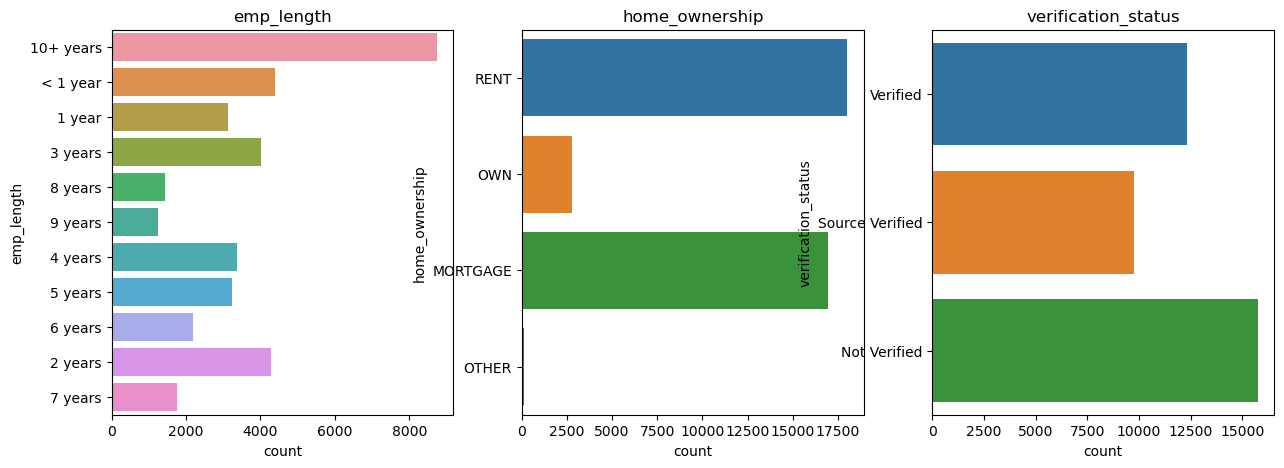

In [38]:
plt.figure(figsize=(15,5))
for i in range(3,6):
    plt.subplot(1, 3, i-2)
    plt.title(df_cat.columns[i])
    sns.countplot(y=df_cat.columns[i], data=df_cat)

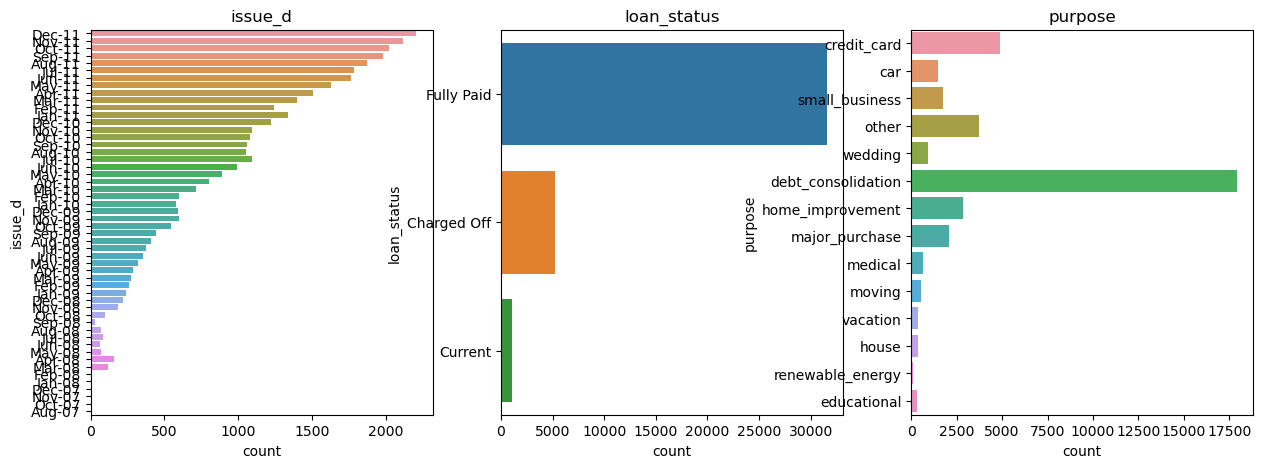

In [39]:
plt.figure(figsize=(15,5))
for i in range(6,9):
    plt.subplot(1, 3, i-5)
    plt.title(df_cat.columns[i])
    sns.countplot(y=df_cat.columns[i], data=df_cat)
    

In [ ]:
## Loan Status is "Charged off" for 5627 cases, these are the defaulters.

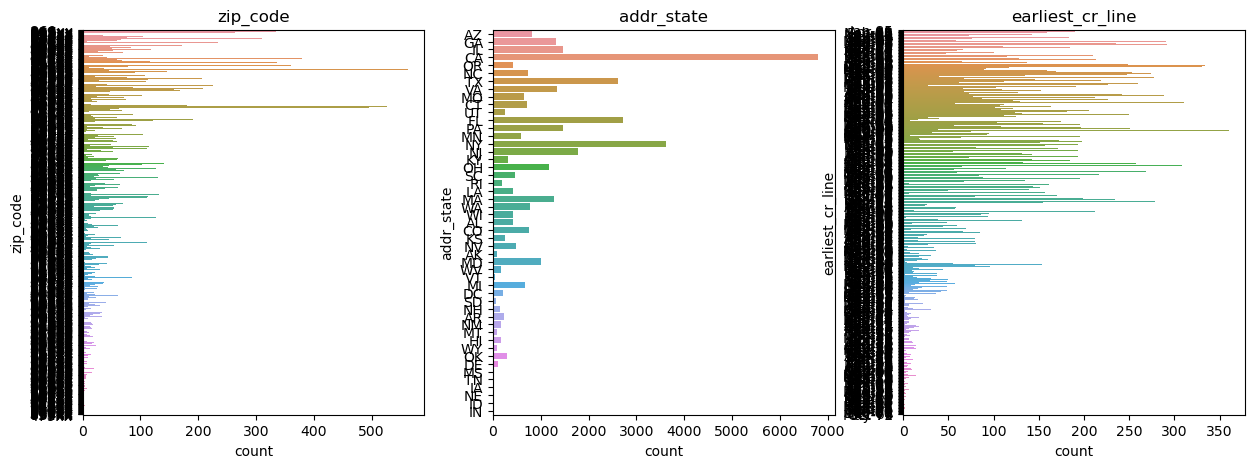

In [41]:
plt.figure(figsize=(15,5))
for i in range(9,12):
    plt.subplot(1, 3, i-8)
    plt.title(df_cat.columns[i])
    sns.countplot(y=df_cat.columns[i], data=df_cat)

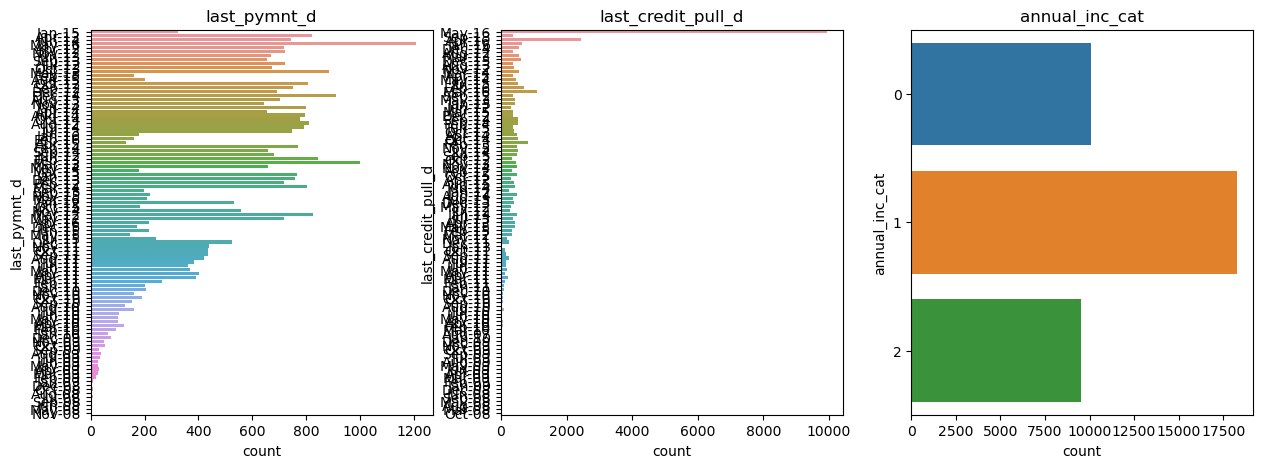

In [42]:
plt.figure(figsize=(15,5))
for i in range(12,15):
    plt.subplot(1, 3, i-11)
    plt.title(df_cat.columns[i])
    sns.countplot(y=df_cat.columns[i], data=df_cat)

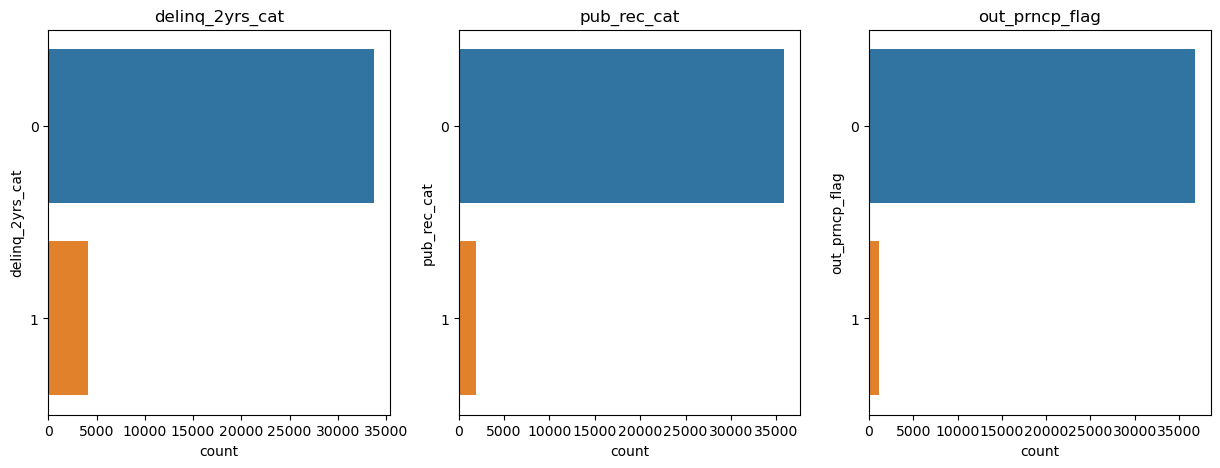

In [43]:
plt.figure(figsize=(15,5))
for i in range(15,18):
    plt.subplot(1, 3, i-14)
    plt.title(df_cat.columns[i])
    sns.countplot(y=df_cat.columns[i], data=df_cat)

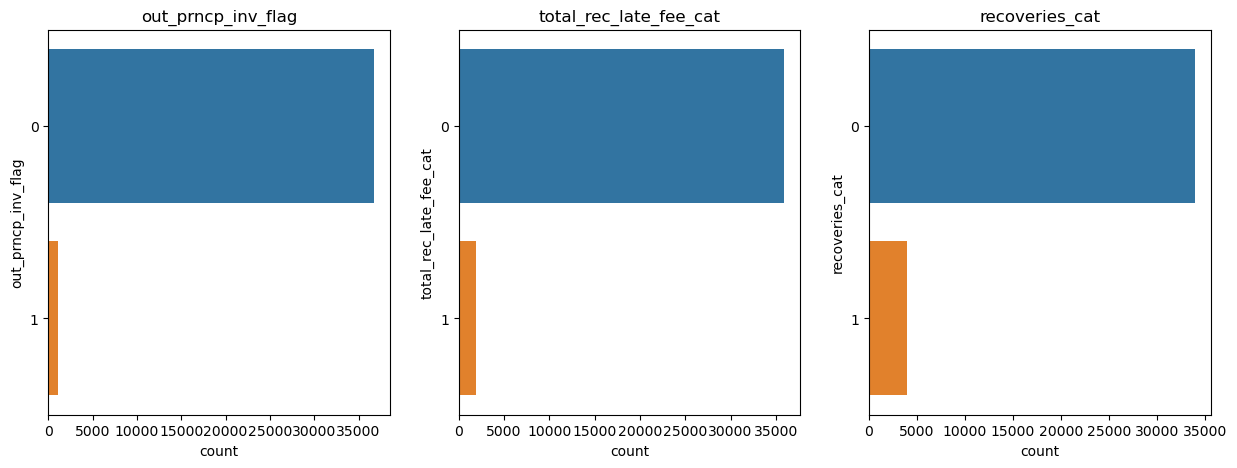

In [44]:
plt.figure(figsize=(15,5))
for i in range(18,21):
    plt.subplot(1, 3, i-17)
    plt.title(df_cat.columns[i])
    sns.countplot(y=df_cat.columns[i], data=df_cat)

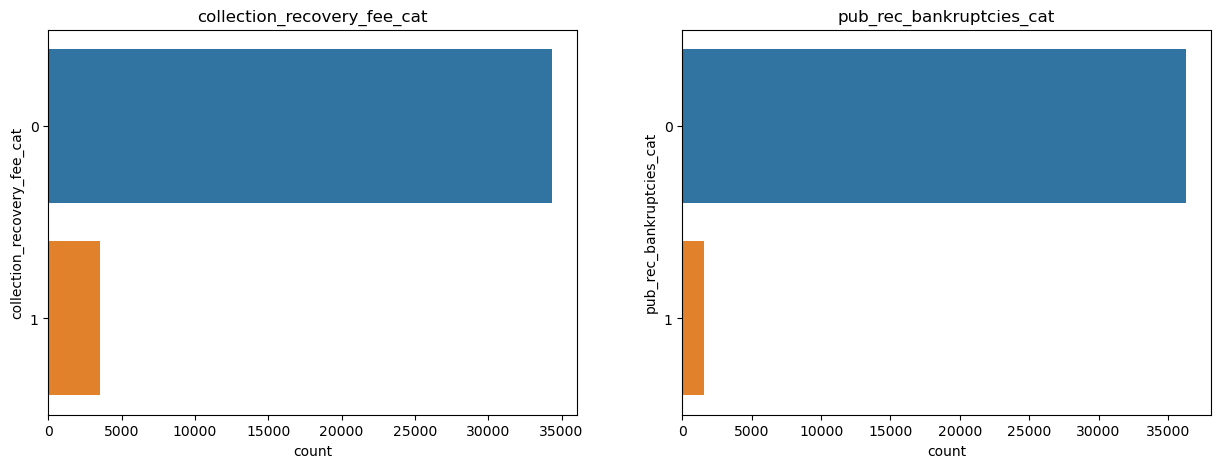

In [46]:
plt.figure(figsize=(15,5))
for i in range(21,23):
    plt.subplot(1, 2, i-20)
    plt.title(df_cat.columns[i])
    sns.countplot(y=df_cat.columns[i], data=df_cat)

## Part3 - Bivariate analysis 

Since the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of defaul, bivariate analysis of different variables with "Loan Status" column would be done.

#### 3.1 Bivariate Analysis- Continuos variables

3.1.1. Before proceding with bivariate analysis of continuous variables, creating correlation matrix for continuous variables

In [124]:
# list of all the continuos variables
df1.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate',
       'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_amnt', 'pub_rec_bankruptcies'],
      dtype='object')

In [119]:
df1.shape

(8, 25)

In [133]:
# List of continuos variable for which buckets have been created
# 1. Annual income
#  2. delinq_2yrs
#  3. pub_rec
#  4. out_prncp_inv
#  5. total_rec_late_fee
#  6. recoveries
#  7. collection_recovery_fee
#  8.pub_rec_bankruptcies

In [121]:
## finding correlation between continuous variables
corr_df = df_clean2[['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate',
       'installment',  'dti',  'inq_last_6mths',
       'open_acc',  'revol_bal', 'revol_util', 'total_acc',
       'out_prncp',  'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 
      'last_pymnt_amnt']]  ## out of 25 continuous columns, removing the columns for which buckets have been created

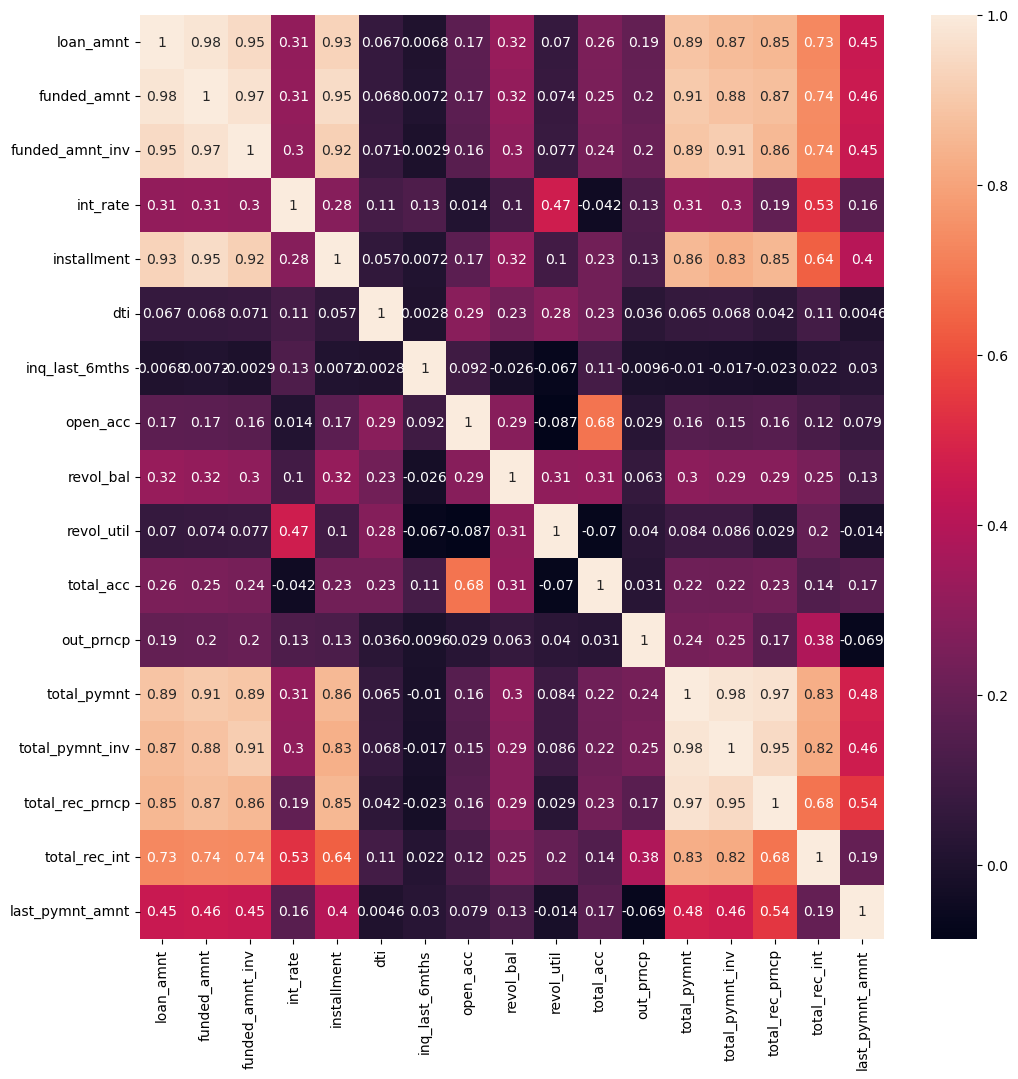

In [122]:
## creating correlation matrix
plt.figure(figsize=[12,12])
corr_matrix = corr_df.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [123]:
corr_matrix[corr_matrix > 0.9] 
# this gives the columns that are highly correlated

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,dti,inq_last_6mths,open_acc,revol_bal,revol_util,total_acc,out_prncp,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_amnt
loan_amnt,1.000000,0.981388,0.953247,NaN,0.928915,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
funded_amnt,0.981388,1.000000,0.972773,NaN,0.954986,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.905752,NaN,NaN,NaN,NaN
funded_amnt_inv,0.953247,0.972773,1.000000,NaN,0.921844,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.913117,NaN,NaN,NaN
int_rate,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
installment,0.928915,0.954986,0.921844,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
dti,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
inq_last_6mths,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
open_acc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
revol_bal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
revol_util,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- Note :From the correlation matrix, it cane be observed that the following set of variables are high correlated:
    1. Loan Amnt, Funded Amnt and Funded Amnt_inv have high corelation are highly correlated
    2. 'total_pymnt', 'total_pymnt_inv' and 'total_rec_prncp' are highly correlated
    3. funded_amnt and total_pymnt are highly correlated
    4. total_pymnt_inv and funded_amnt_inv are highly correlated

##### 3.1.2 Box plots and Barplots of Continuous variables with respect to loan_status.

Loan Status is a categorical variable, to analyse continuous variables acroos this categorical variable, bar plot or box plots can be used.

List of continous variables: 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment',  'dti',  'inq_last_6mths', 'open_acc',  'revol_bal', 'revol_util', 'total_acc', 'out_prncp',  'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'last_pymnt_amnt'. 

For these, buckets have not been created

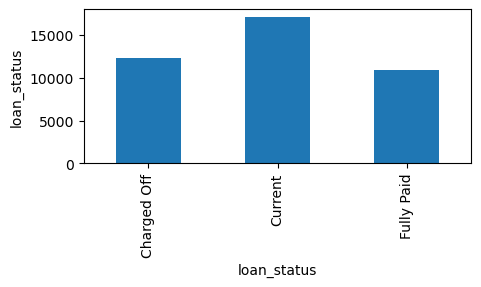

In [182]:
##Ploting a bar plot of loan_amnt vs Loan Status
plt.figure(figsize=(5,2))
df_clean2.groupby(['loan_status'])['loan_amnt'].mean().plot.bar()
plt.ylabel("loan_status")
plt.show()

In [131]:
# to get the loan_status analysis with respect to defaulters (Charged Off) :
# creating further buckets
df_clean2['loan_status_bucket']=df_clean2['loan_status'].apply(lambda x : "defaulters" if x =="Charged Off" else "not defaulters")


Text(0, 0.5, 'loan_status')

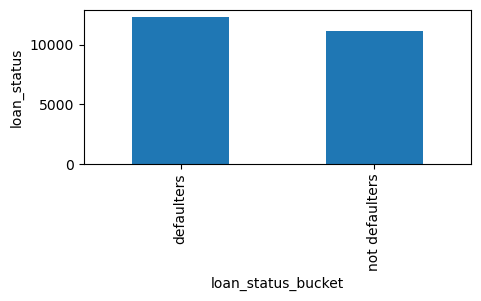

In [170]:
##Ploting a bar plot of average loan_amnt vs loan_status_bucket
plt.figure(figsize=(5,2))
df_clean2.groupby(['loan_status_bucket'])['loan_amnt'].mean().plot.bar()
plt.ylabel("loan_status")


Observation: as observed from above bar plot, loan amount has very slight impact on the loan_status, 
i.e., for defaulters, the average loan amount is slightly higher

C:\Users\aarya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


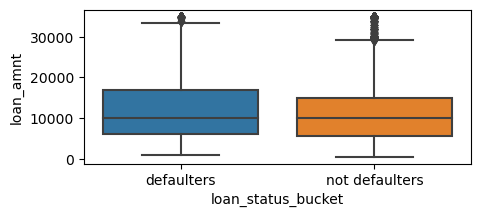

In [171]:
##Plot a box plot  of loan_amnt vs loan_status_bucket
plt.figure(figsize=(5,2))
sns.boxplot(df_clean2['loan_status_bucket'], df_clean2.loan_amnt)
plt.show()

In [183]:
## similarly, creating box plots and barplots for all the continuous variables with respect to loan_status_bucket

In [185]:
len(corr_df.columns)

17

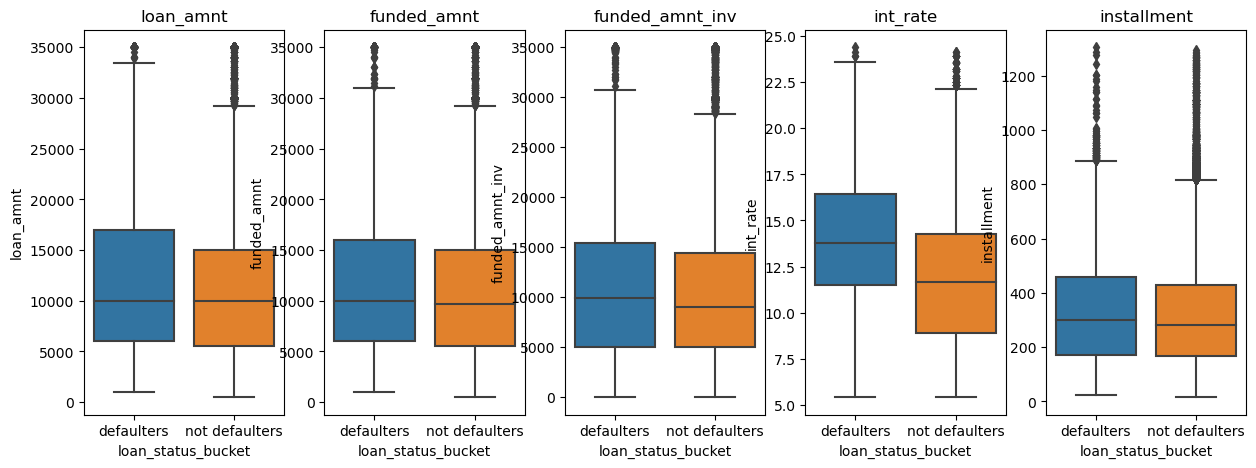

In [199]:
plt.figure(figsize=(15,5))
for i in range(0,5):
    plt.subplot(1, 5, i+1)
    plt.title(corr_df.columns[i])
    sns.boxplot(y=df_clean2[corr_df.columns[i]],x=df_clean2['loan_status_bucket'],data=df_clean2) 
       
    

- Note: out of the 5 variables above, int_rate is the one which has impact on the loan_status_bucket. It can be observed that the mean position for defaulters is higher than the 'not defaulters' (mean position dif ~= 2 units)

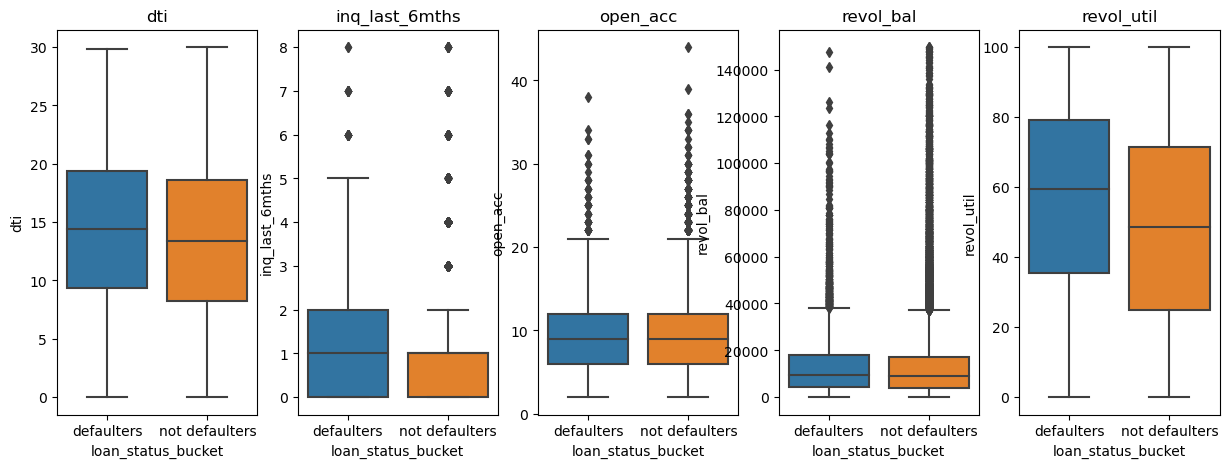

In [191]:
plt.figure(figsize=(15,5))
for i in range(5,10):
    plt.subplot(1, 5, i-4)
    plt.title(corr_df.columns[i])
    sns.boxplot(y=df_clean2[corr_df.columns[i]],x=df_clean2['loan_status_bucket'],data=df_clean2) 

- Note: out of the 5 variables above, dti, inq_lat_6mths and revol_util are the ones which have impact on the loan_status_bucket. 

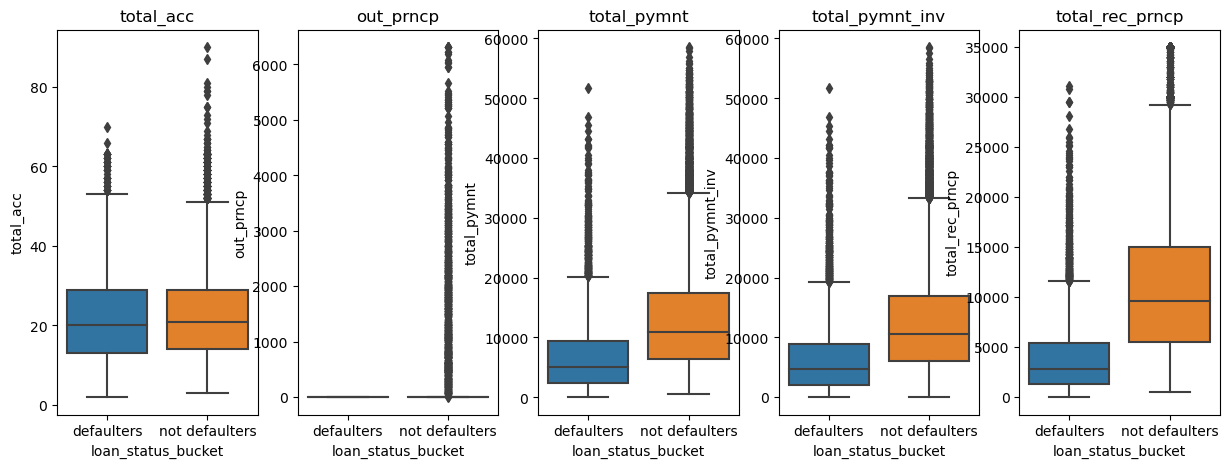

In [192]:
plt.figure(figsize=(15,5))
for i in range(10,15):
    plt.subplot(1, 5, i-9)
    plt.title(corr_df.columns[i])
    sns.boxplot(y=df_clean2[corr_df.columns[i]],x=df_clean2['loan_status_bucket'],data=df_clean2) 

- Note:
    1. out of the 5 variables above, total_pymnt, total_pymnt_inv and total_rec_prncp are the one which have impact on the loan_status_bucket
    2. since all 3 variables are highly correlated, 1 might have been taken into consideration as an important driving factor
   
        2.a. but from the data dictionary definitions, we understood that all of the 3 variables' data can only be obtained after loan has been provided to the customer. Hence, they can not be taken into consideration to identify the chances of defaults and the risky loan applicants


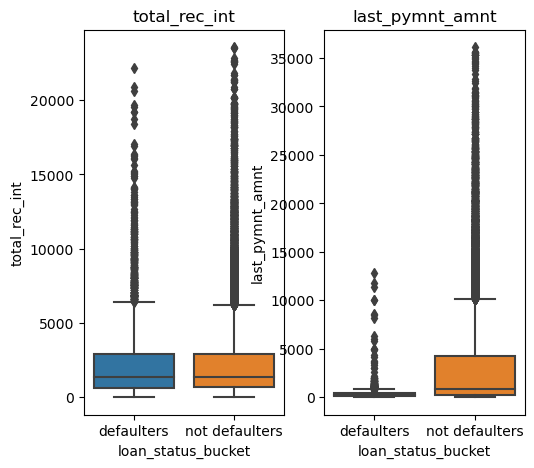

In [319]:
plt.figure(figsize=(15,5))
for i in range(15,17):
    plt.subplot(1, 5, i-14)
    plt.title(corr_df.columns[i])
    sns.boxplot(y=df_clean2[corr_df.columns[i]],x=df_clean2['loan_status_bucket'],data=df_clean2) 

- Note: out of the 2 variables above, last_pymnt_amnt is the one which has impact on the loan_status_bucket. 

In [320]:
## creating bar plots for all the continuous variables with respect to loan_status_bucket

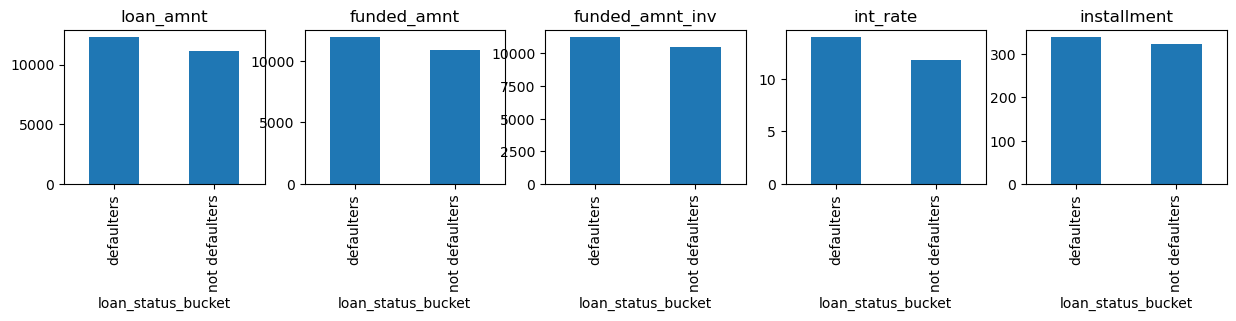

In [207]:
plt.figure(figsize=(15,2))
for i in range(0,5):
    plt.subplot(1, 5, i+1)
    plt.title(corr_df.columns[i])
    df_clean2.groupby(['loan_status_bucket'])[corr_df.columns[i]].mean().plot.bar()
#     plt.ylabel(corr_df.columns[i])    

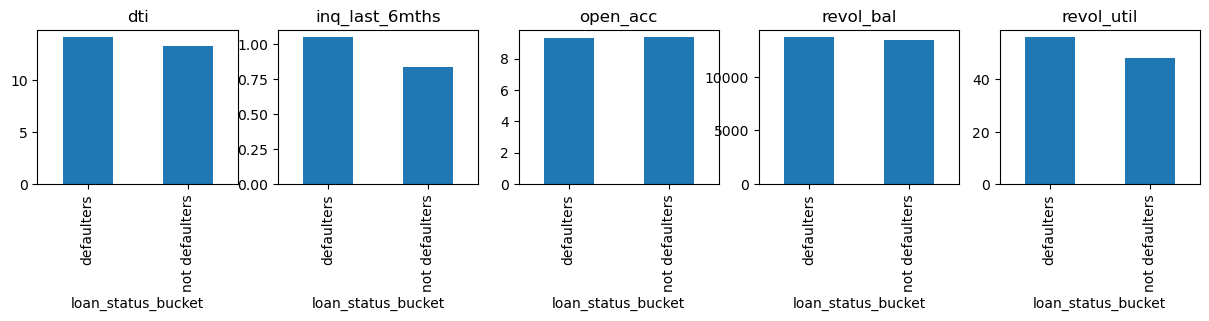

In [208]:
plt.figure(figsize=(15,2))
for i in range(5,10):
    plt.subplot(1, 5, i-4)
    plt.title(corr_df.columns[i])
    df_clean2.groupby(['loan_status_bucket'])[corr_df.columns[i]].mean().plot.bar()
#     plt.ylabel(corr_df.columns[i])    

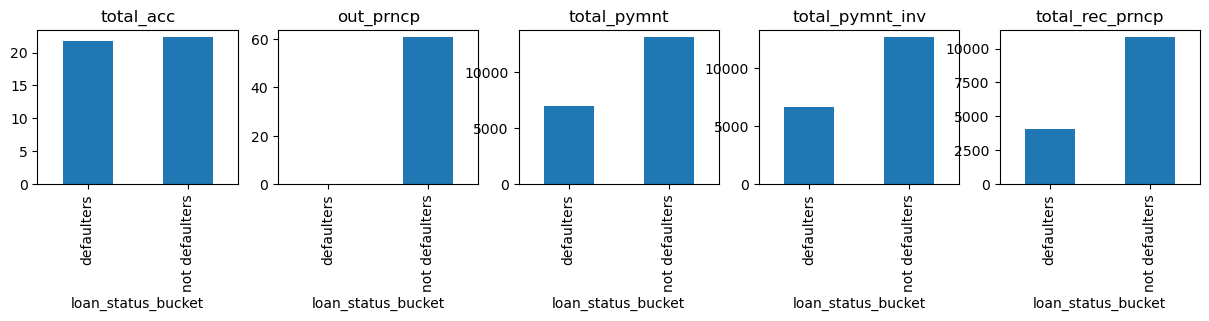

In [209]:
plt.figure(figsize=(15,2))
for i in range(10,15):
    plt.subplot(1, 5, i-9)
    plt.title(corr_df.columns[i])
    df_clean2.groupby(['loan_status_bucket'])[corr_df.columns[i]].mean().plot.bar()
#     plt.ylabel(corr_df.columns[i])    

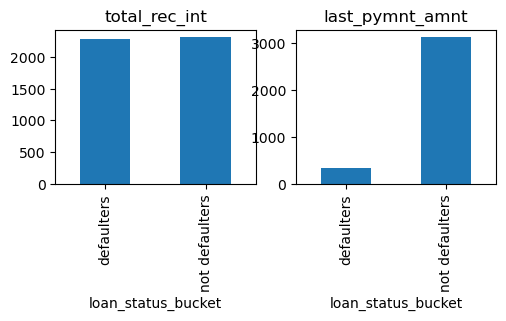

In [210]:
plt.figure(figsize=(15,2))
for i in range(15,17):
    plt.subplot(1, 5, i-14)
    plt.title(corr_df.columns[i]
    df_clean2.groupby(['loan_status_bucket'])[corr_df.columns[i]].mean().plot.bar()
#     plt.ylabel(corr_df.columns[i])    

In [321]:
## we can see that bar plots above provide the same observations as we got from the box plots for the continuous variables

- Note: from the above Bivariate analysis on continuous variables, it can be observed that the following continuous variables have impact on loan_status_bucket

    int_rate, dti, inq_lat_6mths, revol_util, total_pymnt, total_pymnt_inv, total_rec_prncp and last_pymnt_amnt
    
    
- Since from the data dictionary definitions, we understood that the following variables' data can only be obtained after the loan has been provided to the customer. Hence, they can not be taken into consideration to identify the chances of defaults and the risky loan applicants:

     total_pymnt, total_pymnt_inv, total_rec_prncp and last_pymnt_amnt
     
     

- Hence, the final list of continuous variables influencing loan_status_bucket are:

    int_rate, dti, inq_lat_6mths, revol_util

##### 3.2 Bivariate Analysis- Categorical variables  

- A stacked bar chart breaks down each bar of the bar chart on the basis of a different category and hence, stacked bar chart can be used to analyse categorical variables

In [281]:
# analysis for categorical variables with respect to loan_status_bucket which is also categorical variable here.

In [308]:
df_cat.columns  ## df_cat has all the categorical coulmns

Index(['term', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'zip_code',
       'addr_state', 'earliest_cr_line', 'last_pymnt_d', 'last_credit_pull_d',
       'loan_status_var', 'loan_status_bucket', 'annual_inc_cat',
       'delinq_2yrs_cat', 'pub_rec_cat', 'out_prncp_cat', 'out_prncp_inv_cat',
       'total_rec_late_fee_cat', 'recoveries_cat',
       'collection_recovery_fee_cat', 'pub_rec_bankruptcies_cat'],
      dtype='object')

In [309]:
len(df_cat.columns)

25

In [310]:
# removing  'loan_status', 'loan_status_bucket' and dates columns ('last_pymnt_d', 'last_credit_pull_d' and 'issue_d') columns from this list of categorical variables
df_cat_list = df_cat[['term', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'verification_status',  'purpose', 'zip_code',
       'addr_state', 'earliest_cr_line', 'annual_inc_cat',
       'delinq_2yrs_cat', 'pub_rec_cat', 'out_prncp_cat', 'out_prncp_inv_cat',
       'total_rec_late_fee_cat', 'recoveries_cat',
       'collection_recovery_fee_cat', 'pub_rec_bankruptcies_cat']]

Num_cat_var = len(df_cat_list.columns)
print(Num_cat_var)

19


In [312]:
# for bivariate analysis of column annual_inc_cat with respect to loan_status_bucket
groupby_df = df_clean2.groupby(['loan_status_bucket','annual_inc_cat']).size().reset_index(name='counts')
print(groupby_df)
pivot_tbl = pd.pivot_table(data=groupby_df, values="counts", index="annual_inc_cat", columns="loan_status_bucket", aggfunc=sum) ## Creating a pivot table for stacked barchart 

  loan_status_bucket annual_inc_cat  counts
0         defaulters           high     941
1         defaulters            low    1611
2         defaulters         medium    2390
3     not defaulters           high    8121
4     not defaulters            low    8034
5     not defaulters         medium   15334


In [313]:
pivot_tbl

loan_status_bucket,defaulters,not defaulters
annual_inc_cat,,
high,941,8121
low,1611,8034
medium,2390,15334


<AxesSubplot:xlabel='annual_inc_cat'>

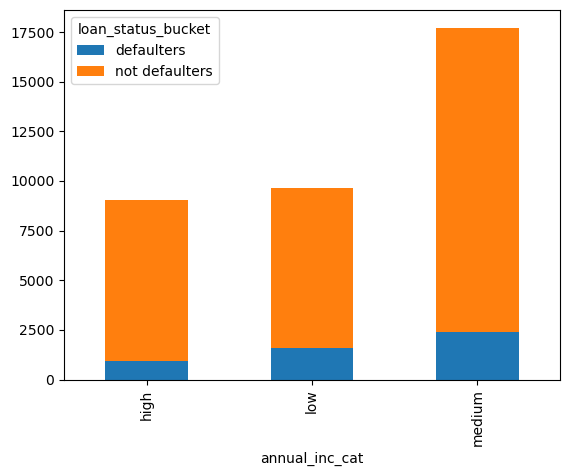

In [314]:
pivot_tbl.plot.bar(stacked=True)

In [315]:
pivot_tbl.columns

Index(['defaulters', 'not defaulters'], dtype='object', name='loan_status_bucket')

- Ploting below the stacked bar chart again wrt to the proportions. It will help to compare the percentage that each category from one variable contributes to a total across categories of the second variable

In [316]:
pivot_tbl_perc = pivot_tbl[pivot_tbl.columns].apply(lambda x: x/x.sum(), axis=1)

<AxesSubplot:xlabel='annual_inc_cat'>

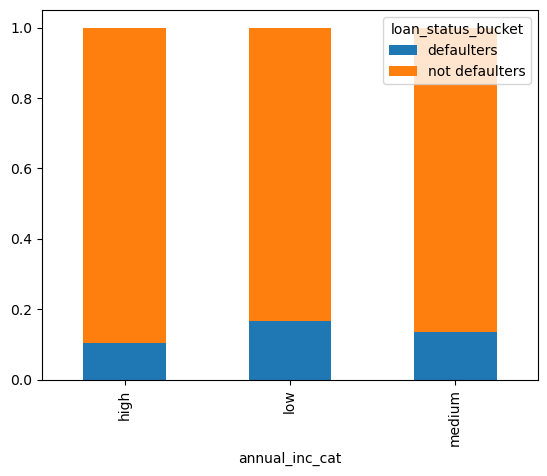

In [317]:
pivot_tbl_perc.plot.bar(stacked=True)


In [ ]:
# observation: to be done

In [ ]:
## similarly, analysing the other categorical variables with respect to loan_status_bucket

loan_status_bucket        defaulters  not defaulters
pub_rec_bankruptcies_cat                            
0                               4630           30301
1                                312            1188
loan_status_bucket        defaulters  not defaulters
pub_rec_bankruptcies_cat                            
0                               4630           30301
1                                312            1188
loan_status_bucket        defaulters  not defaulters
pub_rec_bankruptcies_cat                            
0                               4630           30301
1                                312            1188
loan_status_bucket        defaulters  not defaulters
pub_rec_bankruptcies_cat                            
0                               4630           30301
1                                312            1188
loan_status_bucket        defaulters  not defaulters
pub_rec_bankruptcies_cat                            
0                               4630          

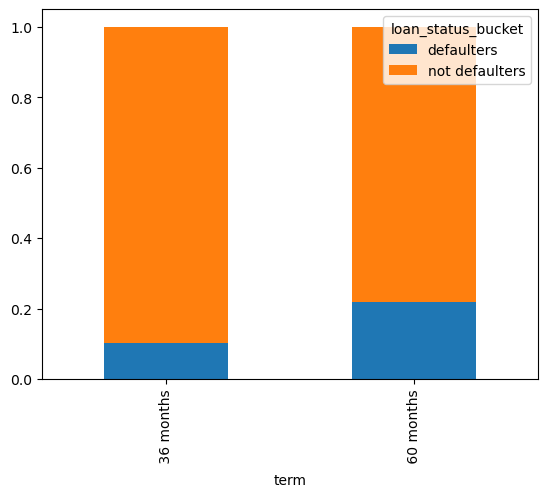

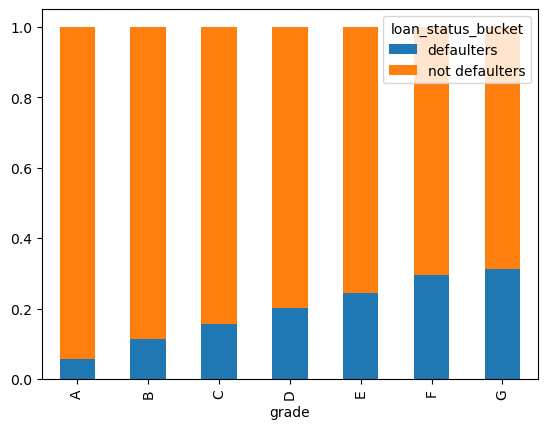

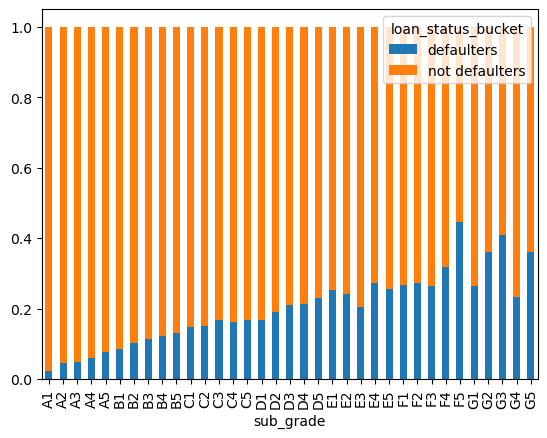

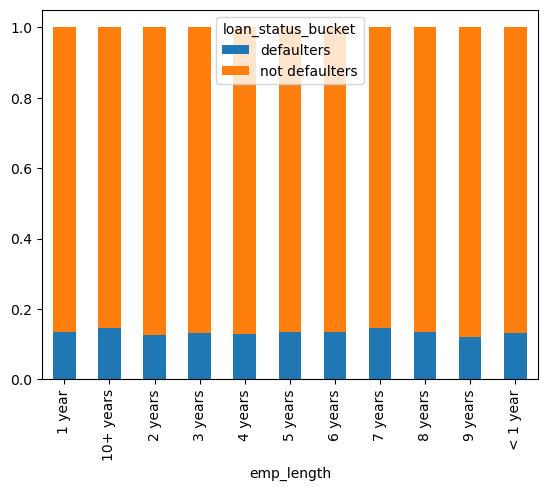

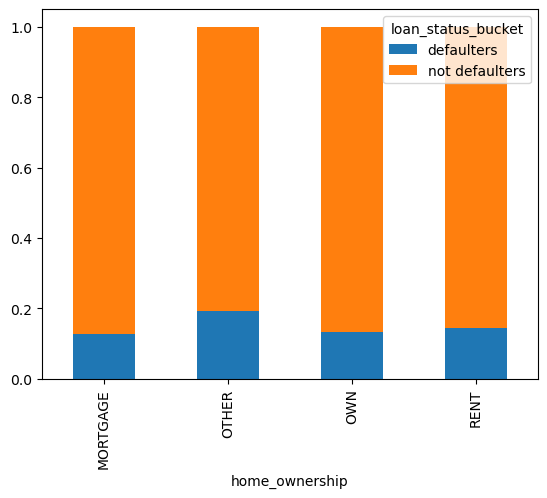

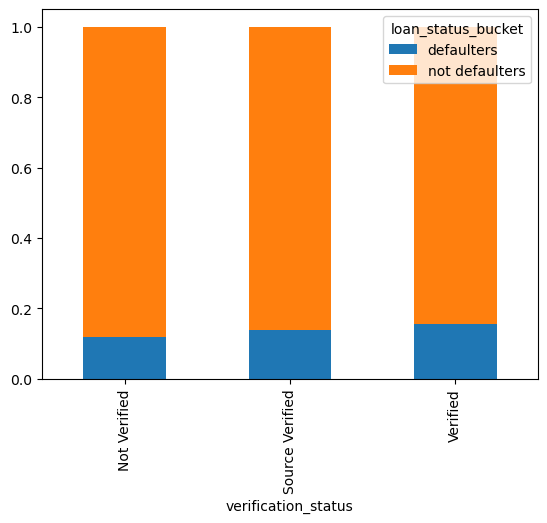

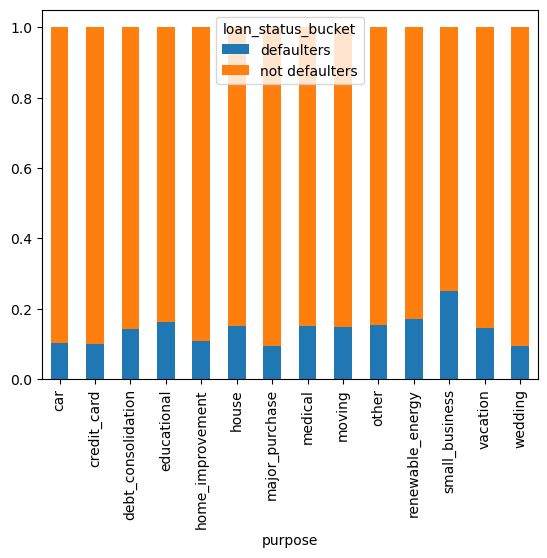

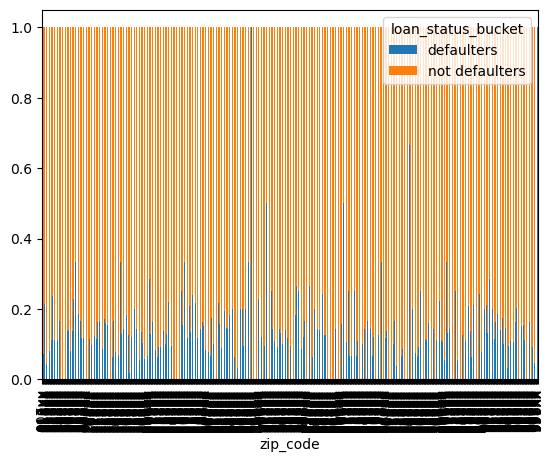

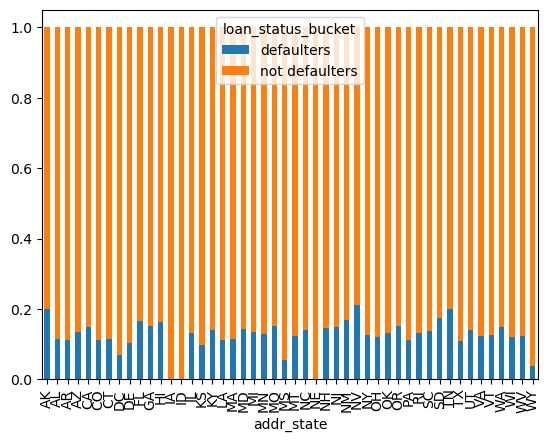

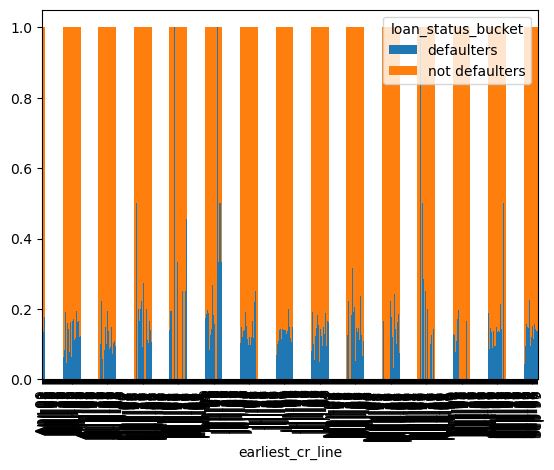

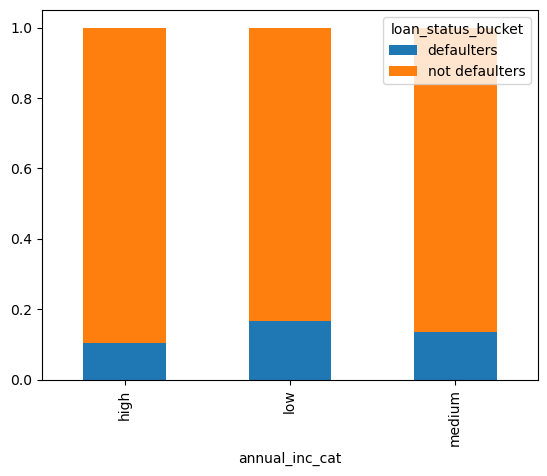

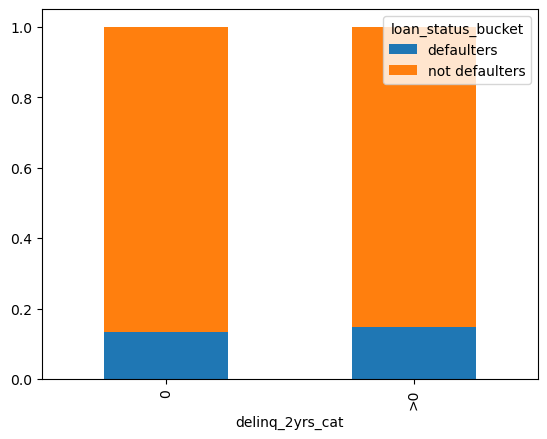

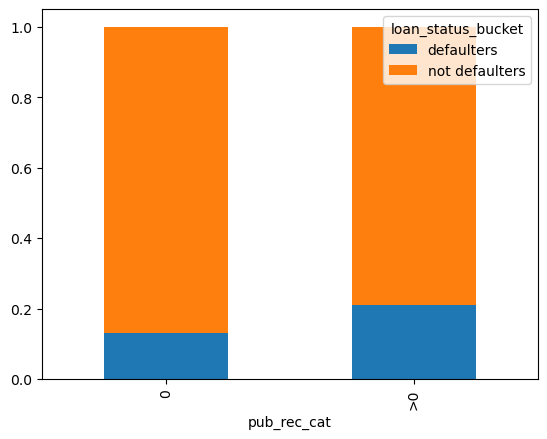

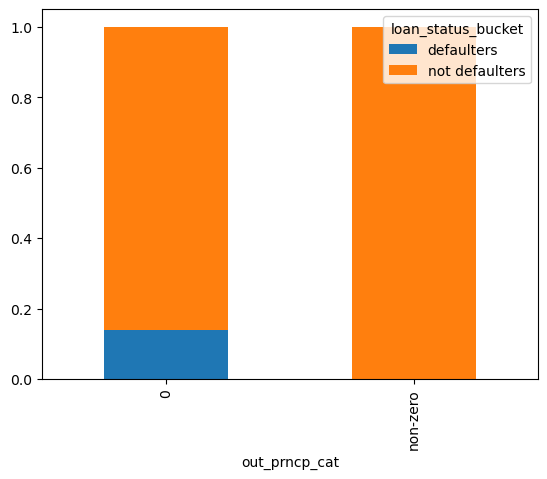

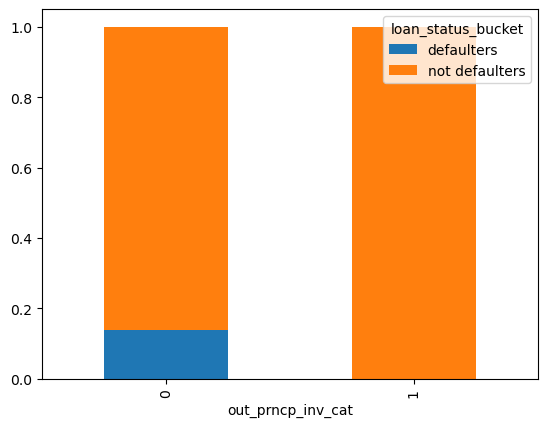

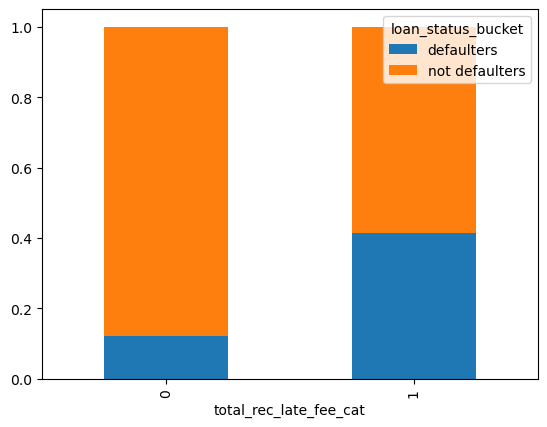

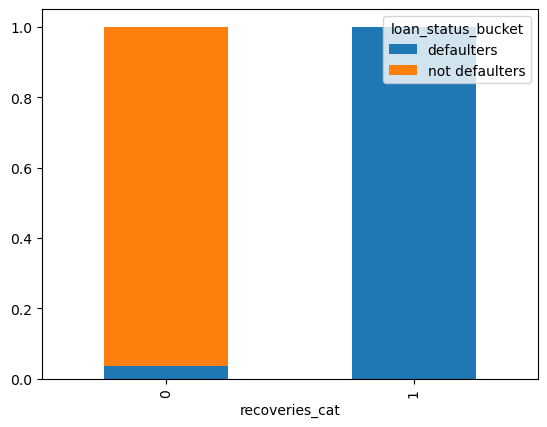

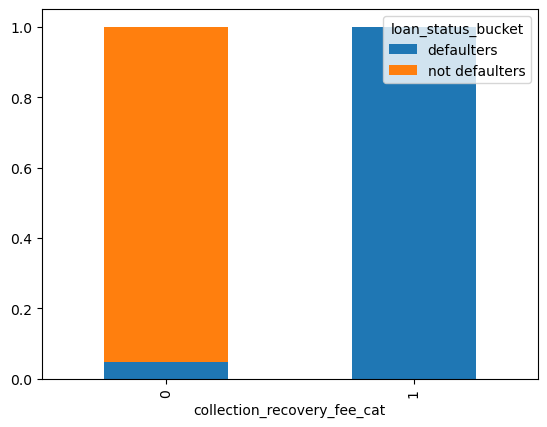

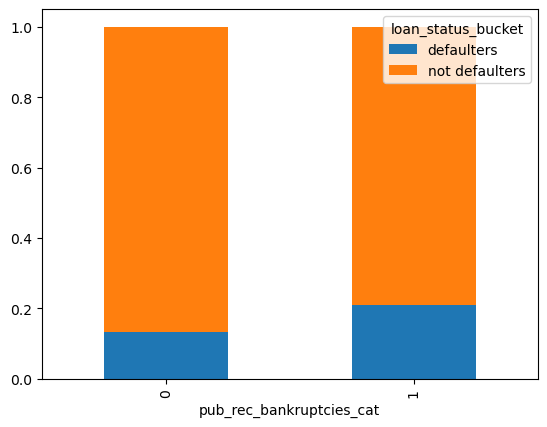

In [318]:
## creating stacked bar charts for all the categorucal variables using for loop (with respect to loan_status_bucket)
for i in range(0,No_cat_var):
    groupby_df = df_clean2.groupby(['loan_status_bucket',df_cat_list.columns[i]]).size().reset_index(name='counts')
#     print(groupby_df)
    pivot_tbl = pd.pivot_table(data=groupby_df, values="counts", index=df_cat_list.columns[i], columns="loan_status_bucket", aggfunc=sum)
    print(ct)
    pivot_tbl_perc = pivot_tbl[pivot_tbl.columns].apply(lambda x: x/x.sum(), axis=1)
#     print(ct_perc)

    pivot_tbl_perc.plot.bar(stacked=True)


- Note: From all the above stacked bar charts for all the categorucal variables, it can be observed that the following categorical variables are influencing loan_status_bucket as the count of 'defaulters' and 'not defaulters' can be seen varying for each of the individual categories of these categorical variables:
    1. term
    2. grade
    3. sub grade
    4. purpose
    5. addr_state
    6. zip code
    7. ann_inc_bucket
    8. 'out_prncp_cat' 
    9. 'out_prncp_inv_cat'
    10. 'total_rec_late_fee_cat'
    11. 'recoveries_cat'
    12. 'collection_recovery_fee_cat'

   
From the data dictionary definitions, we understood that the following variables' data can only be obtained after loan has been provided to the customer. Hence, they can not be taken into consideration to identify the chances of defaults and the risky loan applicants:
1. 'out_prncp_cat'
2. out_prncp_inv_cat
3. total_rec_late_fee_cat
4. recoveries_cat
5. collection_recovery_fee_cat

Also, since grade and sub-grade are related, taking the most granular info into consideration i.e. Sub-Grade.
Similarly, since addr_state and zip code are geographic related variables, taking the most granular info into consideration i.e. zip code.

Hence, the final list of categorical variables influencing loan_status_bucket are:
  1. term
  2. sub grade
  3. purpose
  4. zip code
  5. ann_inc_bucket